### Tasks 4: Customer Segmentation Visualization 

Coded by :Puneet Tiwari
Date : 20-08-2025

*  Imports & Dataset

In [15]:

# Task 4: Customer Segmentation Visualization
# Coded by Puneet Tiwari |
#  Date: 20-Aug-2025
# %pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load cleaned dataset
df = pd.read_csv(r"D:\INTERNSHIP\SAIKET BI\Customer Segmentation Visualization\Tasks 4 Customer Segmentation Visualization)\Telco_Customer_Churn_Cleaned_dataset.CSV")



*  Tenure Segmentation


In [16]:
# Tenure Segmentation
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 36, df['tenure'].max()],
    labels=['0-12 months', '13-36 months', '37+ months'],
    right=True
)

df['tenure_group'].value_counts()


tenure_group
37+ months      3001
0-12 months     2175
13-36 months    1856
Name: count, dtype: int64

* Pie Chart (Matplotlib)

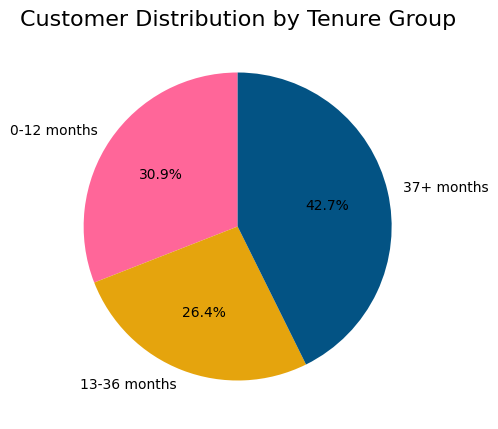

In [17]:
# Pie chart: Customer distribution by tenure group
tenure_counts = df['tenure_group'].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(
    tenure_counts,
    labels=tenure_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ff6699","#E5A40D","#035384"]
)
plt.title("Customer Distribution by Tenure Group", fontsize=16)
plt.show()


* Use a clustered bar chart to compare  average monthly charges across tenure categories

C:\Users\poorn\AppData\Local\Temp\ipykernel_27912\624412221.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



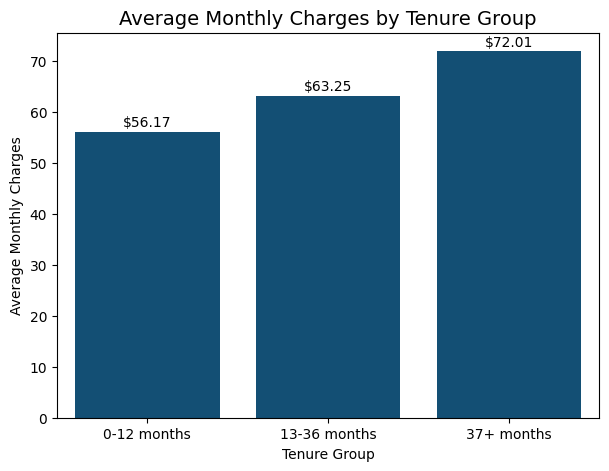

In [18]:
# Average monthly charges by tenure group
avg_charges = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_charges, x='tenure_group', y='monthlycharges', color='#035384')

# annotations
for i, row in avg_charges.iterrows():
    plt.text(i, row['monthlycharges']+1, f"${row['monthlycharges']:.2f}", ha='center')

plt.title("Average Monthly Charges by Tenure Group", fontsize=14)
plt.xlabel("Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.show()


*Interactive visualization*

In [19]:
#this is the customer destribution of tenure group
import plotly.io as pio


pio.renderers.default = "notebook"   

fig = px.pie(
    df,
    names='tenure_group',
    title='Interactive Customer Distribution by Tenure Group',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
